### 3-parameter exponential fitted $\beta$-scaling

Want to fit observable data as a function of $\beta$ to the form:
$$
\mathcal{O}(\beta) = \mathcal{O}_{\beta\to\infty} + C_1 e^{-C_2 \beta}
$$

where $\mathcal{O}_{\beta\to\infty}$,$C_1$, and $C_2$ are fitting parameters. The $\mathcal{O}_{\beta\to\infty}$ parameter will give a large $\beta$ extrapolation of the observable in question. Here, we will focus on the second Rényi entanglement entropy $S_2$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import optimize

Define the exponential model

In [3]:
def exponential(x, c1, c2, c3):
    return c3 + c1*np.exp(-x*c2)

Feed data points (obtained from a separate script)

In [93]:
# Define data points (\ell=9)
x_array = np.array([2,4,6,8,10]) # betas
y_array_exp = np.array([2.577238624734803, 2.5153626640193547, 2.469130481830258, 2.4436116334013245, 2.423796155686147])

sigmas = np.array([0.005725719715720125, 0.007087835254030759, 0.008009470768335508, 0.009177318405925262, 0.01069359798323009])

In [121]:
# (\ell=10)
x_array = np.array([2,4,6,8,10]) # betas
y_array_exp = np.array([2.7901537926305227, 2.7735204545848777, 2.739605264314733, 2.7111202137979618, 2.687220078949394])

sigmas = np.array([0.006671115532097396, 0.007691607288113303, 0.008821571315154519, 0.012078597109331525, 0.01280750882255965])

In [119]:
#(\ell=11)
x_array = np.array([2,4,6,8,10]) # betas
y_array_exp = np.array([2.988089666241106, 3.02279897200804, 3.0006327988627826, 2.9708461053549007, 2.9605376191843282])

sigmas = np.array([0.00772442249884416, 0.009838774007183297, 0.009766325120544003, 0.01292047999395679, 0.0143818587560398])

In [128]:
#(\ell=12)
x_array = np.array([2,4,6,8,10]) # betas
y_array_exp = np.array([3.1871701317716417, 3.2610883795984797, 3.2571436282092896, 3.2392261436458853, 3.214963560384153])

sigmas = np.array([0.009086886189265493, 0.011381746441500482, 0.011956307065224539, 0.01478064651777779, 0.017248042370032985])

In [106]:
#(\ell=13)
x_array = np.array([2,4,6,8,10]) # betas
y_array_exp = np.array([3.3750442410902926, 3.496559841497461, 3.502581038731167, 3.5142857479039167, 3.492704553353092])

sigmas = np.array([0.010479647145332997, 0.012315850364818472, 0.012336212259518402, 0.01781396068545065, 0.01922138167044891])

Text(0.5, 0, '$\\beta$')

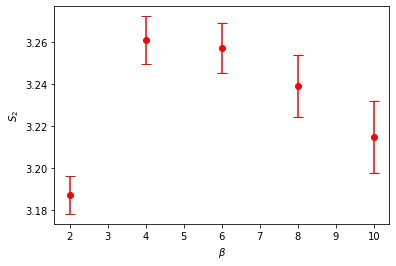

In [129]:
# Plot data
plt.errorbar(x_array,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")

Perform exponential fit to data with Scipy curve_fit

In [123]:
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, x_array[1:], y_array_exp[1:],sigma=sigmas[1:],p0=[1.1,0.9,y_array_exp[-1]])



In [124]:
popt_exponential

array([0.29993639, 0.08743539, 2.56210482])

In [125]:
pcov_exponential

array([[ 2.50125713e-08, -1.62241657e-08, -3.15492412e-08],
       [-1.62241657e-08,  1.08493510e-08,  2.07980103e-08],
       [-3.15492412e-08,  2.07980103e-08,  4.01446133e-08]])

In [126]:
# Extract fit parameters
c1,c2,c3 = popt_exponential

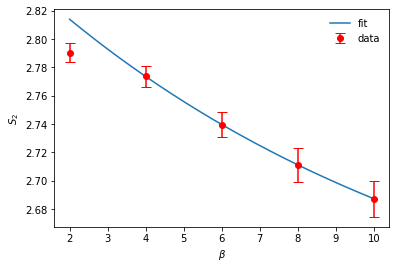

In [127]:
# Perform the fit
betas_fit = np.linspace(min(x_array),max(x_array)*1,1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit')
plt.errorbar(x_array,y_array_exp, yerr=sigmas,color='red',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")
plt.legend(frameon=False);

# plt.axhline(1.4313869097241088,color="#999999",zorder=-1)

# plt.savefig("U0.5_bs10000.png",dpi=300)

In [73]:
y_fit[-1]

0.1084342626651151

In [88]:
c3 = popt_exponential[2]
c3_err = np.sqrt(np.diag(pcov_exponential)[2])

In [89]:
c3,c3_err

(2.861866305155373, 0.2114001816589768)

In [90]:
c3,c3_err,c2

(2.861866305155373, 0.2114001816589768, 0.08665029559607026)

In [113]:
np.diag(pcov_exponential)[0]**0.5

2.984172436513926

In [92]:
print("S2 (extrapolated) \n")
print(f"{c3:0.6f} +/- {c3_err:0.6f}")

S2 (extrapolated) 

2.861866 +/- 0.211400


In [44]:
np.abs(1.433573-1.4313869097241088)/0.003612



0.6052298659721008

# Repeat this analysis for all U/t values below the phase transition